In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Load dataset
df = pd.read_csv('./student_performance.csv')

# Basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (2392, 15)

Column Names:
['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']

First 5 rows:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [16]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # or df.fillna()

# Convert categorical columns to numeric
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    if col != 'target_column':  # don't encode target if it's categorical
        df[col] = le.fit_transform(df[col])

# Drop unnecessary columns (ID columns, irrelevant features)
columns_to_drop = ['id', 'name', 'date']  # adjust based on your dataset
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print("Final dataset shape:", df.shape)


Missing values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Final dataset shape: (2392, 15)


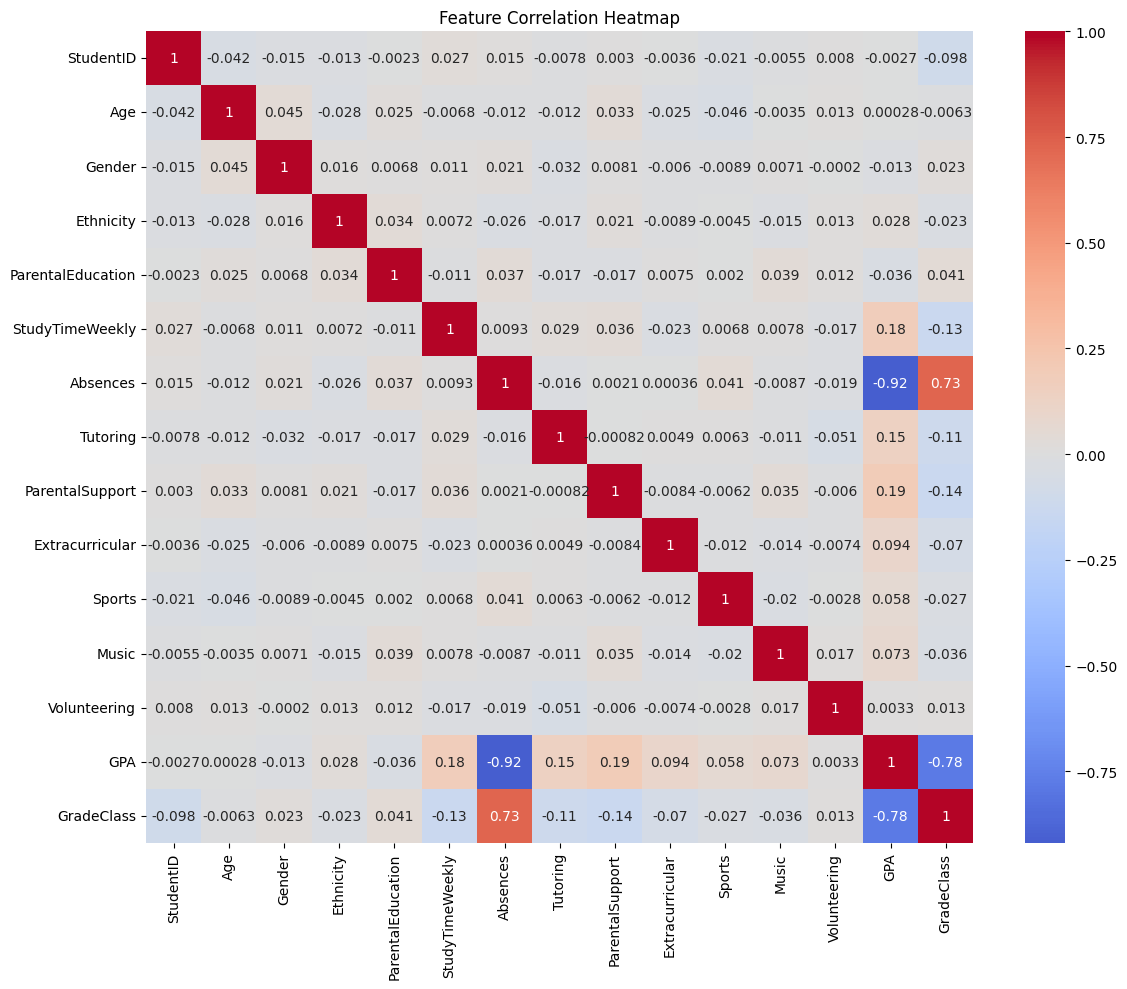

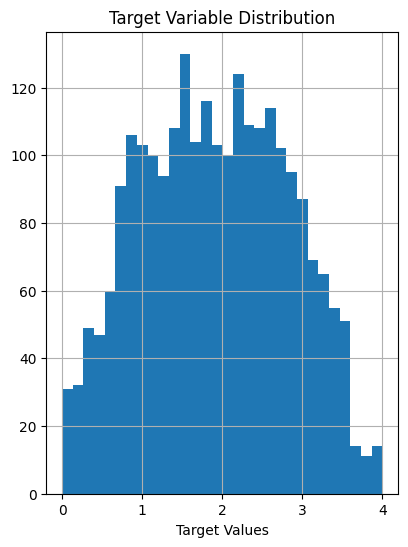

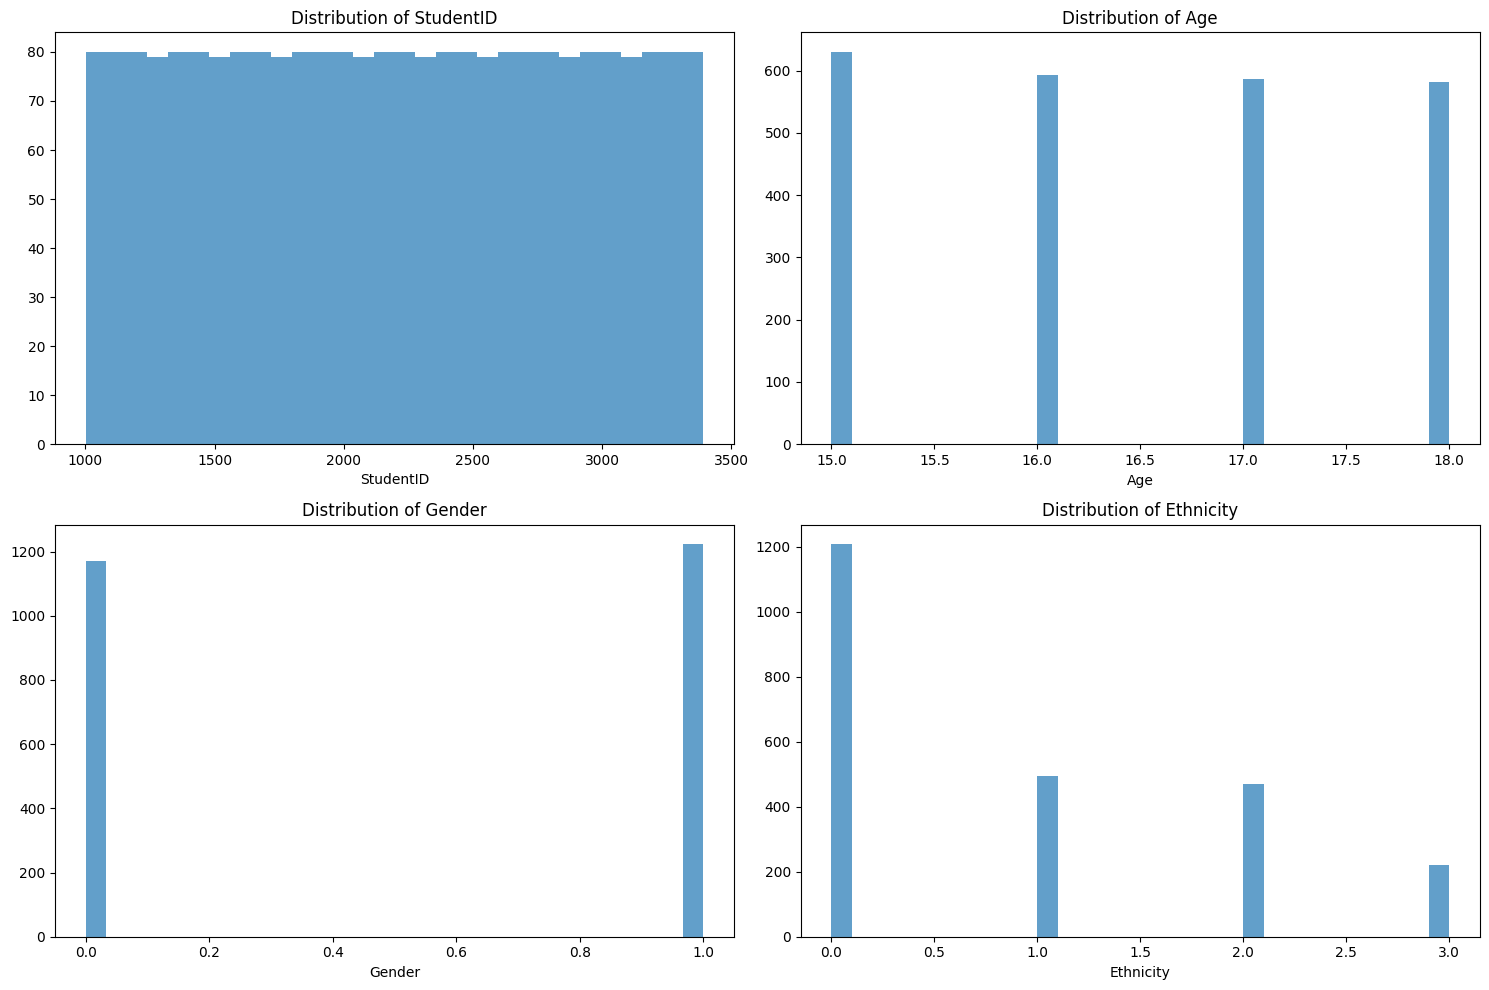

In [18]:
# 1. Correlation Heatmap (MANDATORY)
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# 2. Target variable distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['GPA'].hist(bins=30)
plt.title('Target Variable Distribution')
plt.xlabel('Target Values')

# 3. Feature distributions (show 4 key features)
numeric_columns = df.select_dtypes(include=[np.number]).columns[:4]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=30, alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [22]:
# Define features and target
X = df.drop('GPA', axis=1)  # Replace 'target_column' with your actual target
y = df['GPA']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (MANDATORY)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train_scaled.shape)
print("Test set size:", X_test_scaled.shape)


Training set size: (1913, 14)
Test set size: (479, 14)


In [23]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
results = {}
model_objects = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    results[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Test R²': test_r2
    }

    model_objects[name] = model

    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test R²: {test_r2:.4f}")

# Display results
results_df = pd.DataFrame(results).T
print("\n" + "="*50)
print("MODEL COMPARISON RESULTS")
print("="*50)
print(results_df)


Training Linear Regression...
Train MSE: 0.0361
Test MSE: 0.0359
Test R²: 0.9566

Training Random Forest...
Train MSE: 0.0057
Test MSE: 0.0514
Test R²: 0.9379

Training Decision Tree...
Train MSE: 0.0000
Test MSE: 0.0877
Test R²: 0.8940

MODEL COMPARISON RESULTS
                   Train MSE  Test MSE   Test R²
Linear Regression   0.036090  0.035853  0.956644
Random Forest       0.005707  0.051358  0.937893
Decision Tree       0.000000  0.087665  0.893988


In [24]:
# Find best model (lowest test MSE)
best_model_name = min(results.keys(), key=lambda k: results[k]['Test MSE'])
best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Test MSE: {results[best_model_name]['Test MSE']:.4f}")
print(f"Test R²: {results[best_model_name]['Test R²']:.4f}")

# Save best model and scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Model and scaler saved successfully!")



Best Model: Linear Regression
Test MSE: 0.0359
Test R²: 0.9566
Model and scaler saved successfully!


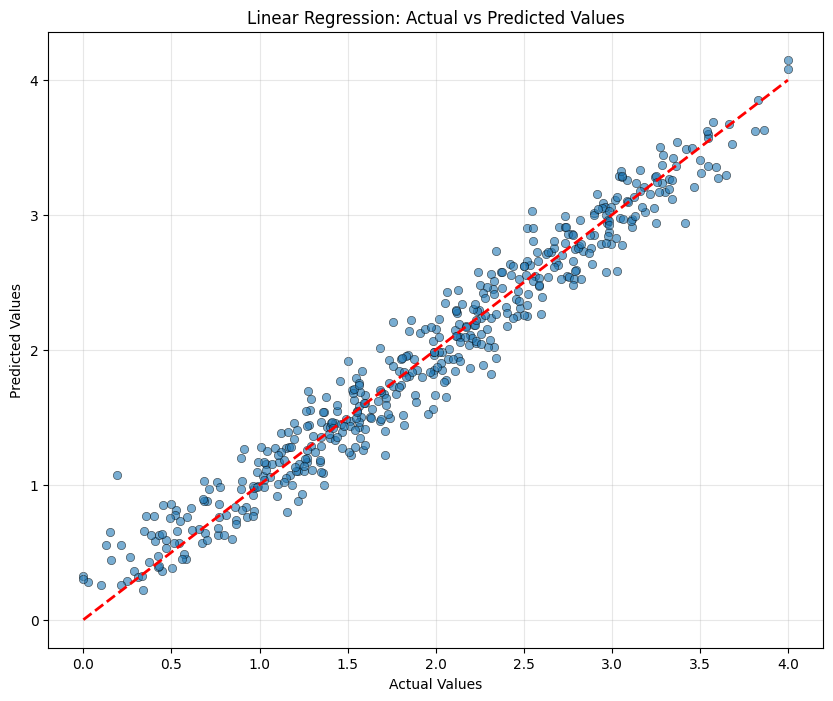

Linear Regression R² Score: 0.9566


In [25]:
# Create scatter plot for Linear Regression specifically
lr_model = model_objects['Linear Regression']
lr_predictions = lr_model.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, lr_predictions, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()

# R² score for the plot
r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression R² Score: {r2:.4f}")


In [26]:
# Test prediction on one sample
sample_index = 0
sample_features = X_test.iloc[sample_index].values
actual_value = y_test.iloc[sample_index]

# Make prediction with best model
if best_model_name == 'Linear Regression':
    sample_scaled = scaler.transform([sample_features])
    prediction = best_model.predict(sample_scaled)[0]
else:
    prediction = best_model.predict([sample_features])[0]

print("SINGLE PREDICTION TEST:")
print(f"Sample features: {sample_features}")
print(f"Actual value: {actual_value:.2f}")
print(f"Predicted value: {prediction:.2f}")
print(f"Error: {abs(actual_value - prediction):.2f}")


SINGLE PREDICTION TEST:
Sample features: [2.0050000e+03 1.5000000e+01 1.0000000e+00 2.0000000e+00 4.0000000e+00
 1.3576348e-01 1.7000000e+01 0.0000000e+00 2.0000000e+00 0.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 4.0000000e+00]
Actual value: 1.43
Predicted value: 1.46
Error: 0.03
